# Data Processing and Imputation for Liver Cancer Prediction
---

This script performs data preprocessing, including:
- Data loading and splitting into training and test sets.
- Handling missing values using different imputation methods.
- Evaluating imputation techniques using regression models.

The dataset originates from the PLCO study and focuses on liver cancer detection.

**Author:** Juan Armario  
**Date:** 2024

# Importing libraries
---

In [57]:
import pandas as pd
import numpy as np

## Others
import warnings
import sys
from collections import Counter

## Plot
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Custom functions
sys.path.append("../../0. Scripts")
import data_analysing_functions as daf
import model_metrics_functions as mmf

## Imputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Selection Models
from sklearn.model_selection import train_test_split

## Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Metrics
from sklearn.metrics import classification_report, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ks_2samp

# Loading Data
---

In [59]:
cleaned_dataset = pd.read_csv('../../0. Data/1. Cleaned/liver_cancer_dataset_with_bq_final_with_target.csv')
pd.set_option('display.max_columns', None)

# Training and Test Division
---
The reasons of why I split data into training and testing sets at the beginning were: 
1. **Avoid data leakage**
	- Data leakage occurs when information from the test set is indirectly used during training, leading to an overly optimistic and unrealistic evaluation of the model’s performance. By splitting the data at the beginning, we ensure that the test set remains completely independent of the training process.
	- If you split the data after preprocessing (such as imputation, transformation, or balancing), the test set might accidentally influence the training process. For example, if imputation parameters or transformations are computed from the entire dataset, including the test set, this could introduce bias.
2.	**Assess the Model’s true performance**
	- Splitting the data into training and testing sets early ensures that the model only sees the training data during the fitting process. The test set should be used solely for the final evaluation of the model to reflect its performance on “new” and unseen data.
3.	**Prevent bias in the Model**
	- If preprocessing and balancing are performed before splitting the data, the parameters calculated from the training data (such as means, standard deviations, and transformations) could be influenced by the test data. This would bias the model by giving it access to information from the test set. For instance, if balancing is done on the entire dataset, synthetic instances generated could reflect patterns from the test data.

In [61]:
cleaned_dataset_copy = cleaned_dataset.copy()
target = cleaned_dataset_copy.liver_cancer
X = cleaned_dataset_copy.drop(columns=['liver_cancer'])

In [62]:
target

0         0
1         0
2         0
3         0
4         0
         ..
149364    0
149365    0
149366    0
149367    0
149368    0
Name: liver_cancer, Length: 149369, dtype: int64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [64]:
X_train

,liver_exitstat,liver_exitage,pipe,cigar,sisters,brothers,fmenstr,menstrs,miscar,tubal,tuballig,bbd,benign_ovcyst,endometriosis,uterine_fib,trypreg,stillb,asppd,ibuppd,hyperten_f,hearta_f,stroke_f,emphys_f,bronchit_f,diabetes_f,polyps_f,arthrit_f,osteopor_f,divertic_f,gallblad_f,race7,surg_prostatectomy,surg_any,preg_f,hyster_f,enlpros_f,infpros_f,urinate_f,vasect_f,bcontr_f,horm_f,smokea_f,ssmokea_f,filtered_f,cig_stat,bmi_curc,height_f,bmi_20c,bmi_50c,colon_comorbidity,liver_comorbidity,fh_cancer,liver_fh,liver_fh_cnt,mortality_exitage,mortality_exitstat,ph_any_trial,ph_liver_trial,center,rndyear,arm,sex,agelevel,in_TGWAS_population
108623,8,74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,69.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,83,2,0,0,8,1998,2,1,1,1
103689,6,63,0.0,0.0,1.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,24.0,NaN,1.0,1.0,4.0,60.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,71,1,0,0,4,1998,2,2,0,0
48600,8,69,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,4.0,64.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,72,3,0,0,6,1996,1,2,0,1
76375,5,79,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,63.0,2.0,3.0,0.0,0.0,1.0,9.0,0.0,79,1,0,0,9,1996,1,1,2,1
119552,8,80,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,40.0,1.0,2.0,2.0,64.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,89,1,0,0,6,2000,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,8,84,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,50.0,1.0,2.0,3.0,71.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,89,1,0,0,4,1995,1,1,3,1
103694,5,71,1.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,28.0,40.0,1.0,2.0,4.0,76.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,71,1,0,0,5,2000,1,1,2,1
131932,8,66,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,NaN,1.0,NaN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,2.0,61.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,75,2,0,0,10,1999,1,2,0,0
146867,8,68,0.0,0.0,1.0,2.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,56.0,1.0,2.0,2.0,65.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,77,2,0,0,5,1998,2,2,0,0


In [65]:
y_train

108623    0
103689    0
48600     0
76375     0
119552    0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: liver_cancer, Length: 119495, dtype: int64

In [66]:
# Training dataset
data_train_full_df = pd.concat([X_train, y_train], axis=1) 
data_train_full_df.head()

,liver_exitstat,liver_exitage,pipe,cigar,sisters,brothers,fmenstr,menstrs,miscar,tubal,tuballig,bbd,benign_ovcyst,endometriosis,uterine_fib,trypreg,stillb,asppd,ibuppd,hyperten_f,hearta_f,stroke_f,emphys_f,bronchit_f,diabetes_f,polyps_f,arthrit_f,osteopor_f,divertic_f,gallblad_f,race7,surg_prostatectomy,surg_any,preg_f,hyster_f,enlpros_f,infpros_f,urinate_f,vasect_f,bcontr_f,horm_f,smokea_f,ssmokea_f,filtered_f,cig_stat,bmi_curc,height_f,bmi_20c,bmi_50c,colon_comorbidity,liver_comorbidity,fh_cancer,liver_fh,liver_fh_cnt,mortality_exitage,mortality_exitstat,ph_any_trial,ph_liver_trial,center,rndyear,arm,sex,agelevel,in_TGWAS_population,liver_cancer
108623,8,74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,69.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,83,2,0,0,8,1998,2,1,1,1,0
103689,6,63,0.0,0.0,1.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,24.0,NaN,1.0,1.0,4.0,60.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,71,1,0,0,4,1998,2,2,0,0,0
48600,8,69,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,4.0,64.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,72,3,0,0,6,1996,1,2,0,1,0
76375,5,79,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,63.0,2.0,3.0,0.0,0.0,1.0,9.0,0.0,79,1,0,0,9,1996,1,1,2,1,0
119552,8,80,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.0,40.0,1.0,2.0,2.0,64.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,89,1,0,0,6,2000,1,2,3,0,0


In [67]:
data_train_full_df.shape

(119495, 65)

In [68]:
# Test dataset
data_test_full_df = pd.concat([X_test, y_test], axis=1)
data_test_full_df.head()

,liver_exitstat,liver_exitage,pipe,cigar,sisters,brothers,fmenstr,menstrs,miscar,tubal,tuballig,bbd,benign_ovcyst,endometriosis,uterine_fib,trypreg,stillb,asppd,ibuppd,hyperten_f,hearta_f,stroke_f,emphys_f,bronchit_f,diabetes_f,polyps_f,arthrit_f,osteopor_f,divertic_f,gallblad_f,race7,surg_prostatectomy,surg_any,preg_f,hyster_f,enlpros_f,infpros_f,urinate_f,vasect_f,bcontr_f,horm_f,smokea_f,ssmokea_f,filtered_f,cig_stat,bmi_curc,height_f,bmi_20c,bmi_50c,colon_comorbidity,liver_comorbidity,fh_cancer,liver_fh,liver_fh_cnt,mortality_exitage,mortality_exitstat,ph_any_trial,ph_liver_trial,center,rndyear,arm,sex,agelevel,in_TGWAS_population,liver_cancer
45422,8,70,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,64.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,79,2,0,0,6,1996,1,1,0,1,0
96586,8,69,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,3.0,65.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,78,2,0,0,8,1999,1,2,0,1,0
82126,8,77,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,69.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,80,1,1,0,2,1995,2,1,1,0,0
64335,8,79,0.0,0.0,3.0,7.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,2.0,66.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,80,1,0,0,9,1999,1,2,2,1,0
18858,4,76,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,17.0,26.0,1.0,2.0,2.0,73.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,89,2,0,0,3,1995,2,1,2,0,0


In [69]:
data_train_full_df.to_csv("../../0. Data/2. Training and Test/data_train_full_df.csv", index=False)
data_test_full_df.to_csv("../../0. Data/2. Training and Test/data_test_full_df.csv", index=False)

# Analysing missing values and outliers
---

In this section, we will conduct a thorough analysis of missing values and outliers present in the dataset. The presence of missing data can significantly impact the performance of Machine Learning models, while outliers can distort the distribution of variables, leading to less accurate models and a higher risk of overfitting.

**Steps to follow in this analysis:**
- **Identification of missing values** in each variable and their proportion in the dataset.
- **Application of different imputation strategies,** including mean/median/mode imputation, regression models, and advanced techniques such as KNN and MICE.
- **Outlier analysis through visualizations,** such as histograms and boxplots.
- **Comparison of imputation methods** to select the best strategy based on performance metrics.

This process will allow us to clean and optimize the dataset before applying Machine Learning models, ensuring that predictions are as accurate and robust as possible. 

In [71]:
daf.nulls_percentage(data_train_full_df)

liver_exitstat , 0.0% nulls , 7 unique values, int64
liver_exitage , 0.0% nulls , 37 unique values, int64
pipe , 1.0% nulls , 3 unique values, float64
cigar , 1.2% nulls , 3 unique values, float64
sisters , 1.0% nulls , 8 unique values, float64
brothers , 0.7% nulls , 8 unique values, float64
fmenstr , 0.1% nulls , 6 unique values, float64
menstrs , 0.9% nulls , 5 unique values, float64
miscar , 0.2% nulls , 3 unique values, float64
tubal , 0.2% nulls , 3 unique values, float64
tuballig , 0.2% nulls , 3 unique values, float64
bbd , 1.2% nulls , 2 unique values, float64
benign_ovcyst , 2.3% nulls , 2 unique values, float64
endometriosis , 2.5% nulls , 2 unique values, float64
uterine_fib , 1.8% nulls , 2 unique values, float64
trypreg , 0.2% nulls , 2 unique values, float64
stillb , 0.4% nulls , 3 unique values, float64
asppd , 0.4% nulls , 8 unique values, float64
ibuppd , 0.7% nulls , 8 unique values, float64
hyperten_f , 0.6% nulls , 2 unique values, float64
hearta_f , 0.7% nulls , 2

## Simple Imputation
---

### Media y mediana
---

In [74]:
mean_median_imputed_train_df = data_train_full_df.copy()

#### Missing values or nulls > 40%

In [76]:
daf.get_columns_with_percentage_or_higher(mean_median_imputed_train_df, 40, 99.99)

smokea_f , 46.6% nulls , 63 unique values, float64
ssmokea_f , 57.7% nulls , 67 unique values, float64
filtered_f , 46.4% nulls , 3 unique values, float64


In [77]:
si_mv_greater_40 = ['smokea_f', 'ssmokea_f', 'filtered_f']
si_mv_greater_40_dt = mean_median_imputed_train_df[si_mv_greater_40]

array([[<Axes: title={'center': 'smokea_f'}>,
        <Axes: title={'center': 'ssmokea_f'}>],
       [<Axes: title={'center': 'filtered_f'}>, <Axes: >]], dtype=object)

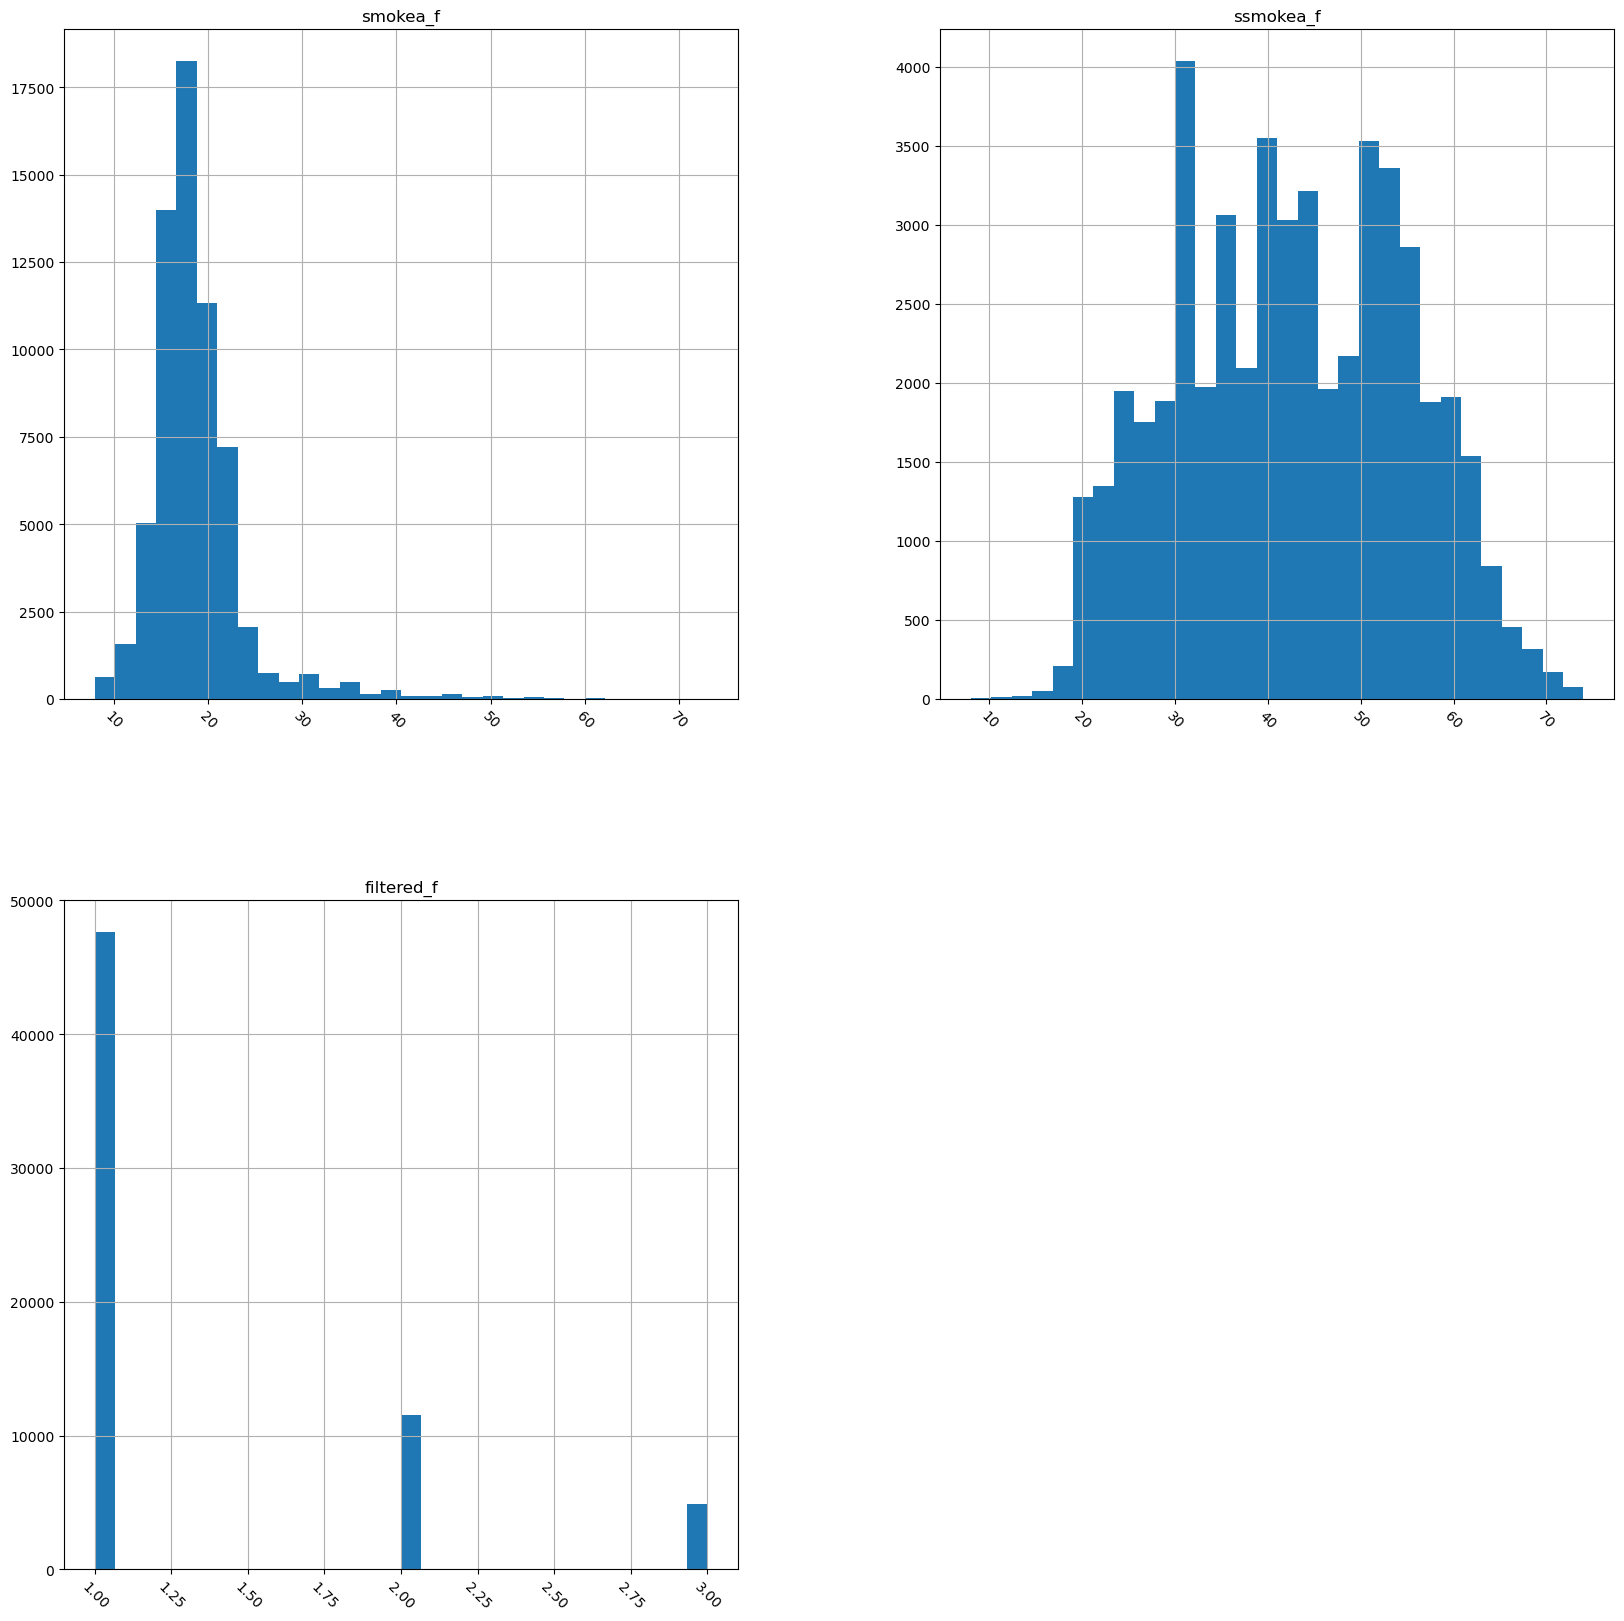

In [78]:
si_mv_greater_40_dt.hist(figsize=(20,20), bins = 30, xrot=-45)

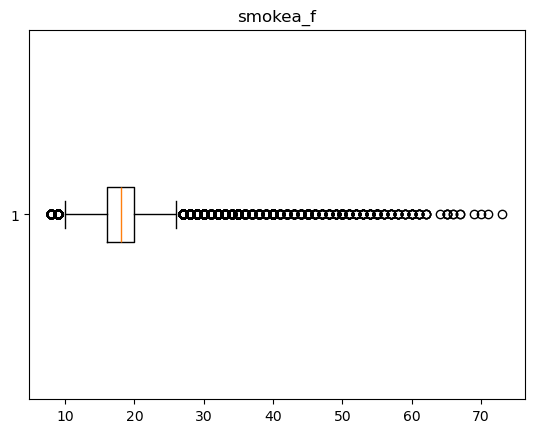

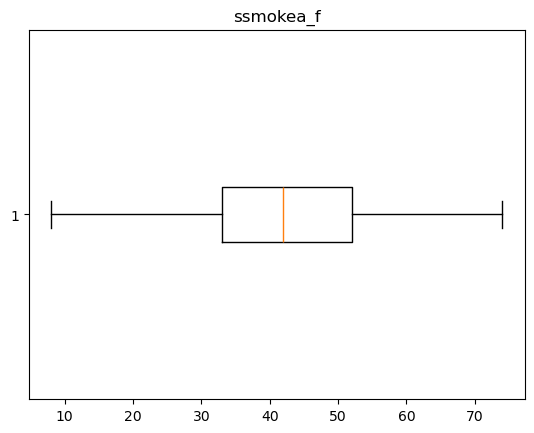

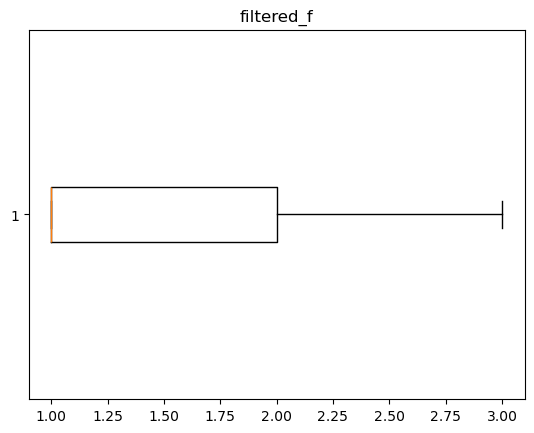

In [79]:
daf.boxplot_for_list(mean_median_imputed_train_df, si_mv_greater_40)

In [80]:
mean_median_imputed_train_df['smokea_f'].fillna(mean_median_imputed_train_df['smokea_f'].median(), inplace = True)
mean_median_imputed_train_df['ssmokea_f'].fillna(mean_median_imputed_train_df['ssmokea_f'].mean(), inplace = True)
mean_median_imputed_train_df['filtered_f'].fillna(mean_median_imputed_train_df['filtered_f'].mode()[0], inplace = True)

#### Missing values or nulls between 20% and 40%

In [82]:
daf.get_columns_with_percentage_or_higher(mean_median_imputed_train_df, 1, 40)

cigar , 1.2% nulls , 3 unique values, float64
bbd , 1.2% nulls , 2 unique values, float64
benign_ovcyst , 2.3% nulls , 2 unique values, float64
endometriosis , 2.5% nulls , 2 unique values, float64
uterine_fib , 1.8% nulls , 2 unique values, float64
surg_prostatectomy , 1.6% nulls , 2 unique values, float64
infpros_f , 8.2% nulls , 2 unique values, float64
bmi_curc , 1.5% nulls , 4 unique values, float64
bmi_20c , 1.8% nulls , 4 unique values, float64
bmi_50c , 1.4% nulls , 4 unique values, float64


In [83]:
si_mv_between_1_and_40 = ['pipe', 'cigar', 'bbd', 'benign_ovcyst', 'endometriosis', 'uterine_fib', 'surg_prostatectomy', 'infpros_f', 'bmi_curc', 'bmi_20c', 'bmi_50c']
si_mv_between_1_and_40_dt = mean_median_imputed_train_df[si_mv_between_1_and_40]

array([[<Axes: title={'center': 'pipe'}>,
        <Axes: title={'center': 'cigar'}>,
        <Axes: title={'center': 'bbd'}>],
       [<Axes: title={'center': 'benign_ovcyst'}>,
        <Axes: title={'center': 'endometriosis'}>,
        <Axes: title={'center': 'uterine_fib'}>],
       [<Axes: title={'center': 'surg_prostatectomy'}>,
        <Axes: title={'center': 'infpros_f'}>,
        <Axes: title={'center': 'bmi_curc'}>],
       [<Axes: title={'center': 'bmi_20c'}>,
        <Axes: title={'center': 'bmi_50c'}>, <Axes: >]], dtype=object)

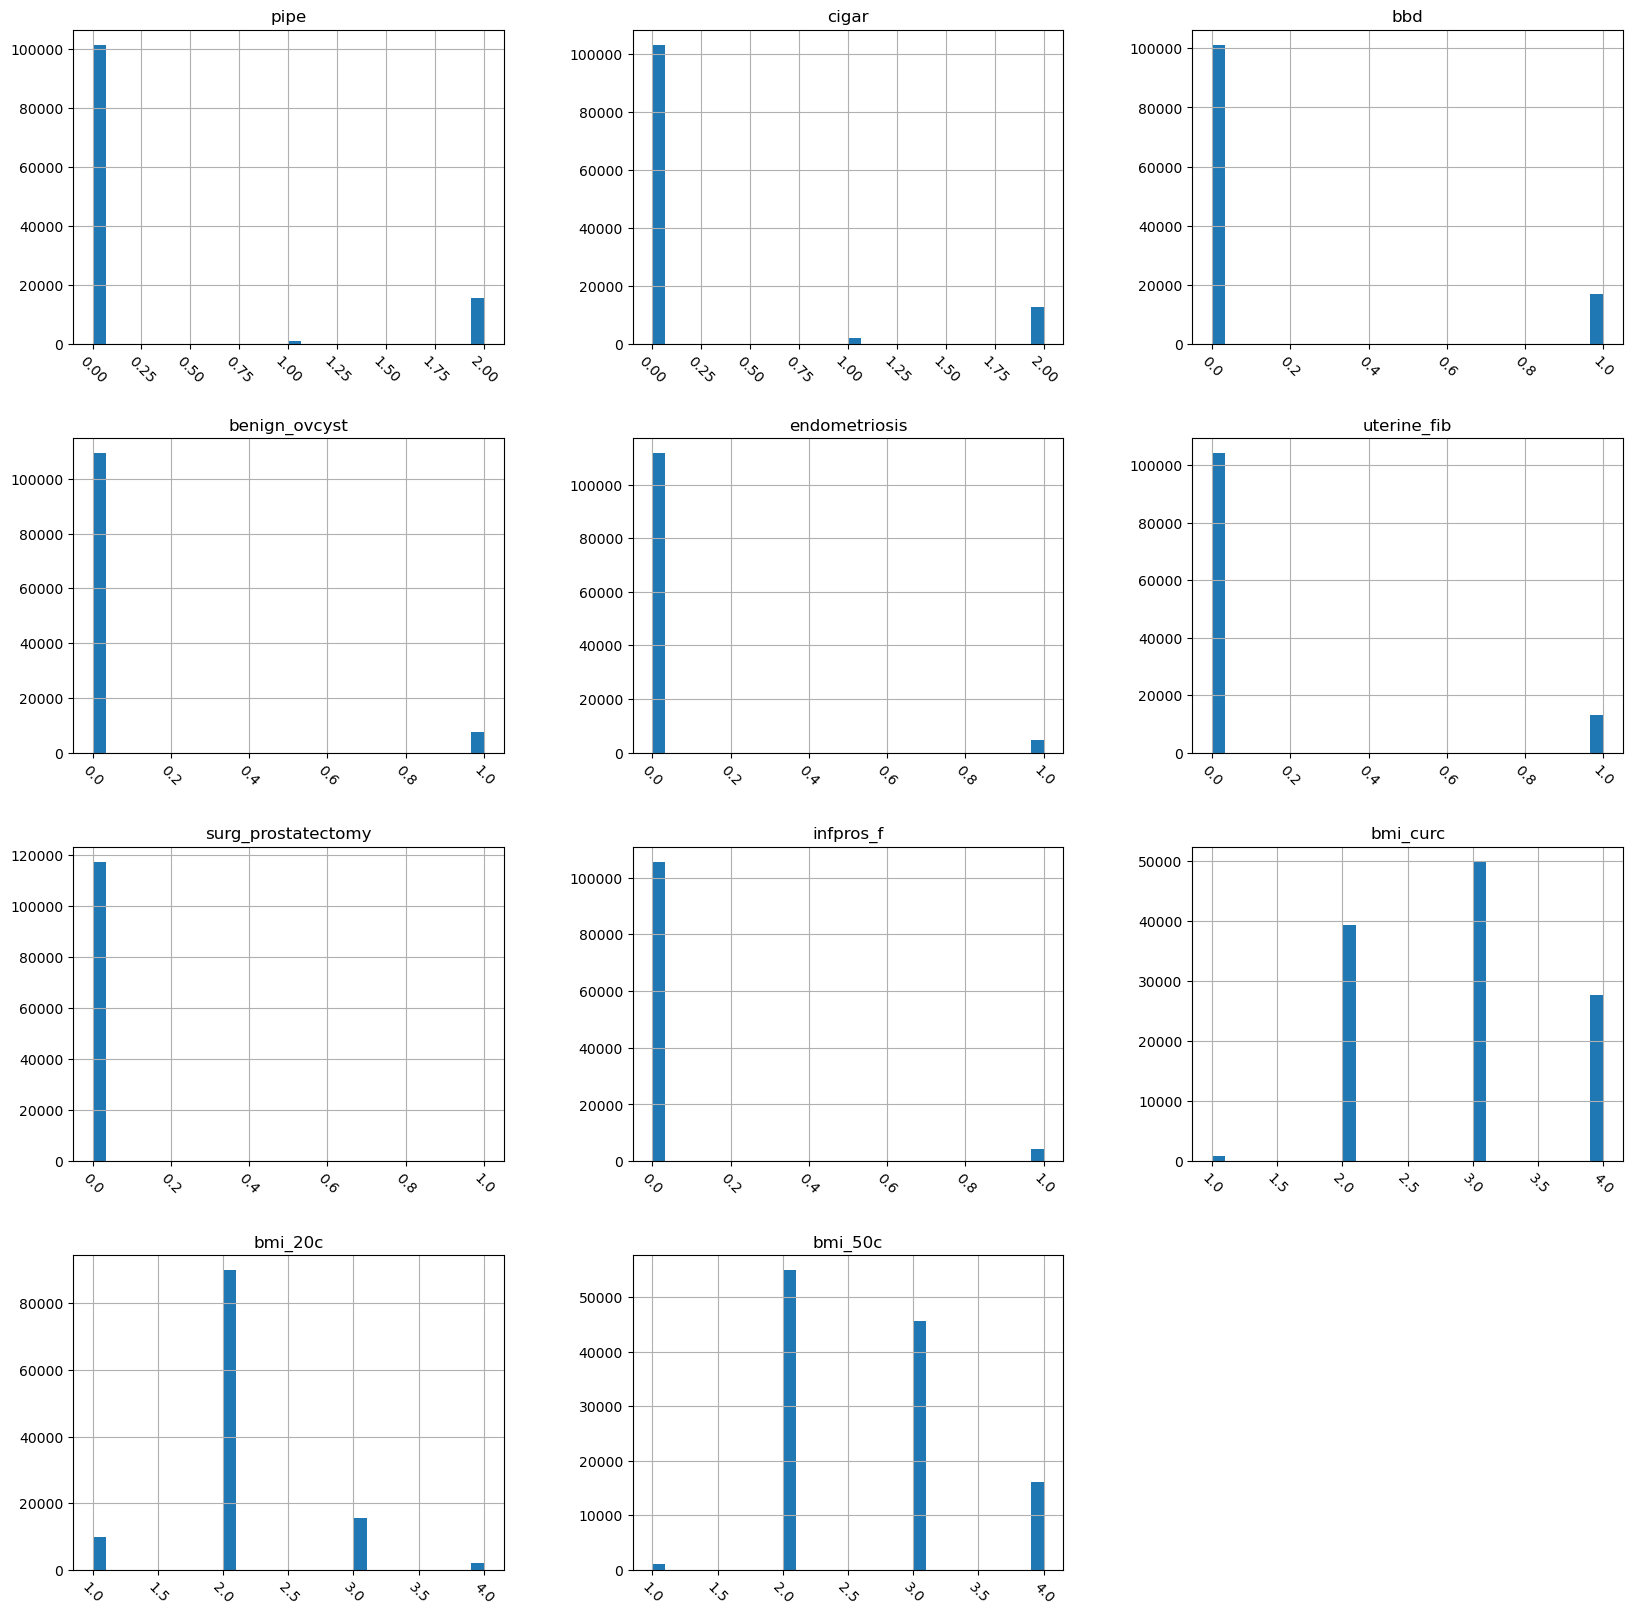

In [84]:
si_mv_between_1_and_40_dt.hist(figsize=(20,20), bins = 30, xrot=-45)

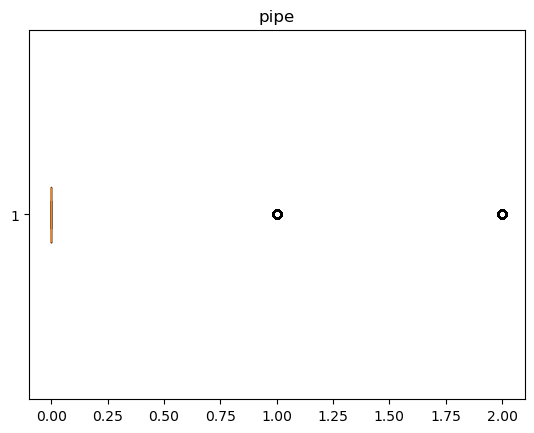

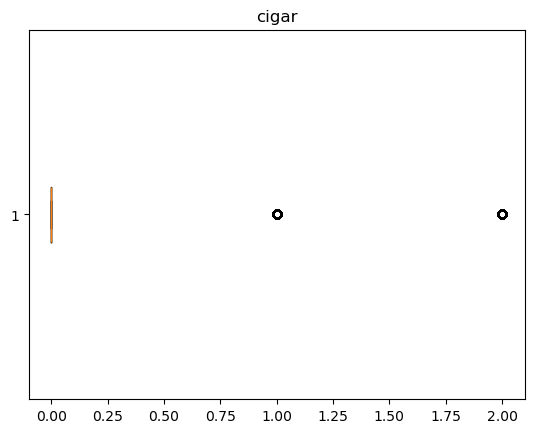

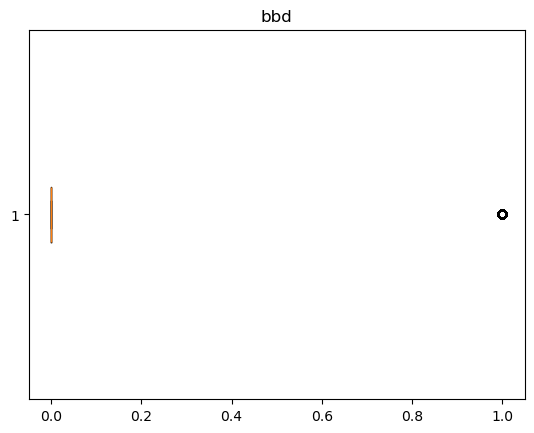

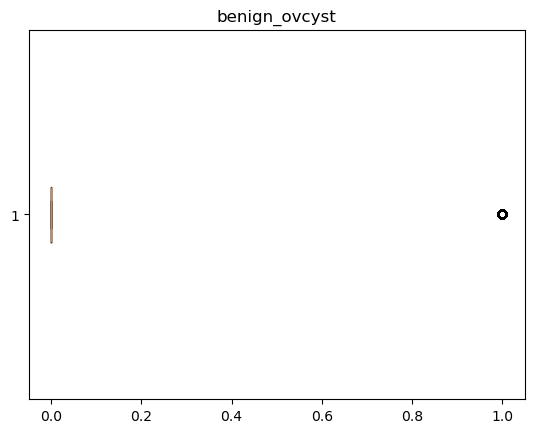

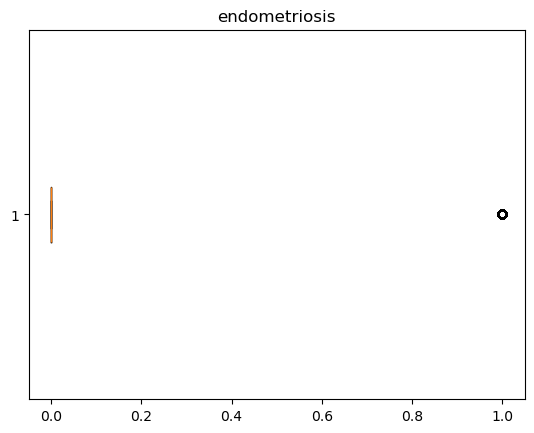

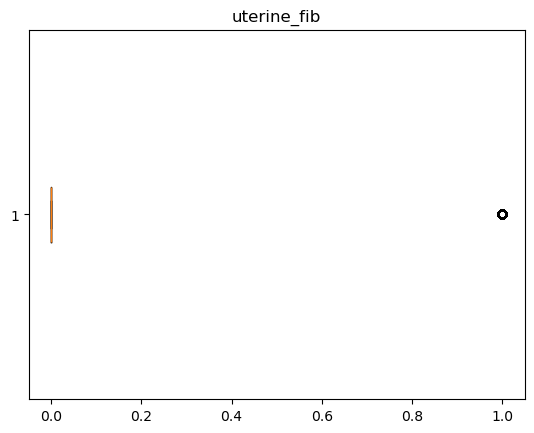

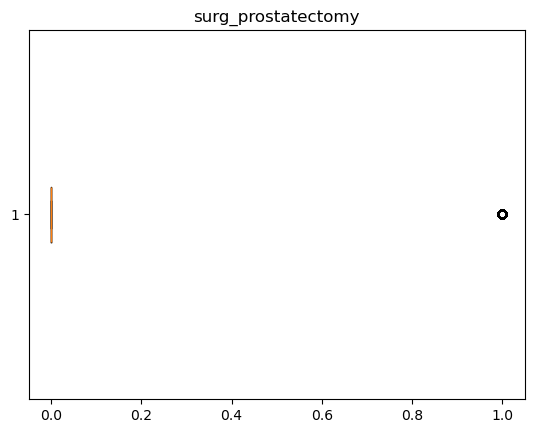

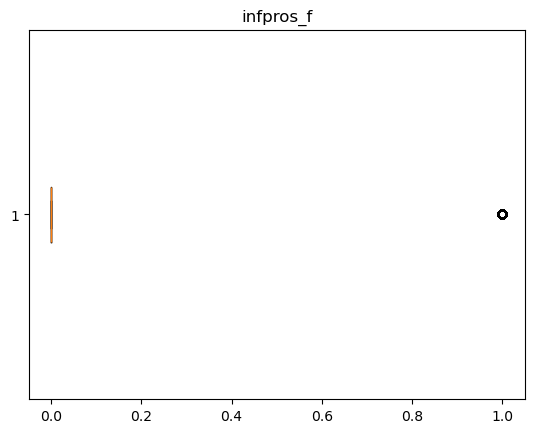

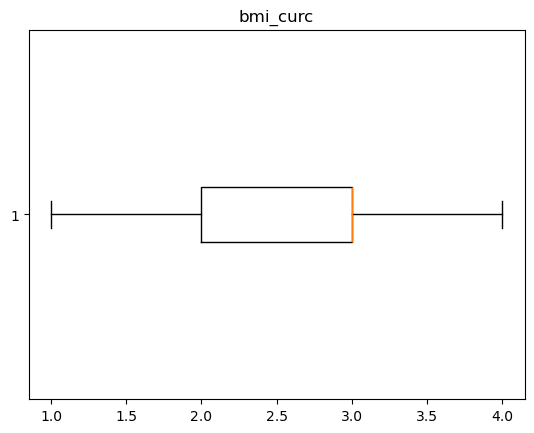

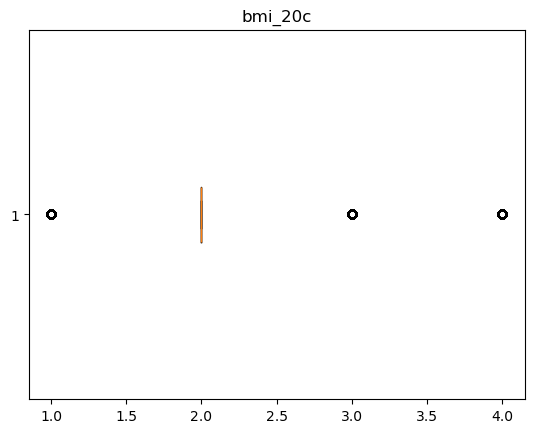

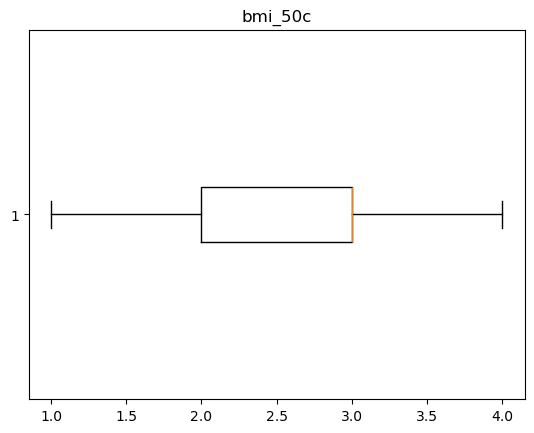

In [85]:
daf.boxplot_for_list(mean_median_imputed_train_df, si_mv_between_1_and_40_dt)

In [86]:
mean_median_imputed_train_df['pipe'].fillna(mean_median_imputed_train_df['pipe'].mode()[0], inplace = True)
mean_median_imputed_train_df['cigar'].fillna(mean_median_imputed_train_df['cigar'].mode()[0], inplace = True)
mean_median_imputed_train_df['bbd'].fillna(mean_median_imputed_train_df['bbd'].mode()[0], inplace = True)
mean_median_imputed_train_df['benign_ovcyst'].fillna(mean_median_imputed_train_df['benign_ovcyst'].mode()[0], inplace = True)
mean_median_imputed_train_df['endometriosis'].fillna(mean_median_imputed_train_df['endometriosis'].mode()[0], inplace = True)
mean_median_imputed_train_df['uterine_fib'].fillna(mean_median_imputed_train_df['uterine_fib'].mode()[0], inplace = True)
mean_median_imputed_train_df['surg_prostatectomy'].fillna(mean_median_imputed_train_df['surg_prostatectomy'].mode()[0], inplace = True)
mean_median_imputed_train_df['infpros_f'].fillna(mean_median_imputed_train_df['infpros_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['bmi_curc'].fillna(mean_median_imputed_train_df['bmi_curc'].mode()[0], inplace = True)
mean_median_imputed_train_df['bmi_20c'].fillna(mean_median_imputed_train_df['bmi_20c'].mode()[0], inplace = True)
mean_median_imputed_train_df['bmi_50c'].fillna(mean_median_imputed_train_df['bmi_50c'].mode()[0], inplace = True)

#### Missing values or nulls < 1%

In [88]:
daf.get_columns_with_percentage_or_higher(mean_median_imputed_train_df, 0, 2)

sisters , 1.0% nulls , 8 unique values, float64
brothers , 0.7% nulls , 8 unique values, float64
fmenstr , 0.1% nulls , 6 unique values, float64
menstrs , 0.9% nulls , 5 unique values, float64
miscar , 0.2% nulls , 3 unique values, float64
tubal , 0.2% nulls , 3 unique values, float64
tuballig , 0.2% nulls , 3 unique values, float64
trypreg , 0.2% nulls , 2 unique values, float64
stillb , 0.4% nulls , 3 unique values, float64
asppd , 0.4% nulls , 8 unique values, float64
ibuppd , 0.7% nulls , 8 unique values, float64
hyperten_f , 0.6% nulls , 2 unique values, float64
hearta_f , 0.7% nulls , 2 unique values, float64
stroke_f , 0.6% nulls , 2 unique values, float64
emphys_f , 0.6% nulls , 2 unique values, float64
bronchit_f , 0.7% nulls , 2 unique values, float64
diabetes_f , 0.6% nulls , 2 unique values, float64
polyps_f , 0.8% nulls , 2 unique values, float64
arthrit_f , 0.7% nulls , 2 unique values, float64
osteopor_f , 0.8% nulls , 2 unique values, float64
divertic_f , 0.8% nulls , 2

In [89]:
si_mv_lower_than_1 = ['sisters', 'brothers', 'fmenstr', 'menstrs', 'miscar', 'tubal', 'tuballig', 
                      'trypreg', 'stillb', 'asppd', 'ibuppd', 'hyperten_f', 'hearta_f', 
                      'stroke_f', 'emphys_f', 'bronchit_f', 'diabetes_f', 'polyps_f', 
                      'arthrit_f', 'osteopor_f', 'divertic_f', 'gallblad_f', 'hyster_f', 'enlpros_f', 
                      'urinate_f', 'vasect_f', 'bcontr_f', 'horm_f', 'height_f', 
                      'colon_comorbidity', 'liver_comorbidity', 'fh_cancer', 'liver_fh', 'liver_fh_cnt', 'surg_any', 'preg_f', 'cig_stat'
                     ]
si_mv_lower_than_1_dt = mean_median_imputed_train_df[si_mv_lower_than_1]

array([[<Axes: title={'center': 'sisters'}>,
        <Axes: title={'center': 'brothers'}>,
        <Axes: title={'center': 'fmenstr'}>,
        <Axes: title={'center': 'menstrs'}>,
        <Axes: title={'center': 'miscar'}>,
        <Axes: title={'center': 'tubal'}>],
       [<Axes: title={'center': 'tuballig'}>,
        <Axes: title={'center': 'trypreg'}>,
        <Axes: title={'center': 'stillb'}>,
        <Axes: title={'center': 'asppd'}>,
        <Axes: title={'center': 'ibuppd'}>,
        <Axes: title={'center': 'hyperten_f'}>],
       [<Axes: title={'center': 'hearta_f'}>,
        <Axes: title={'center': 'stroke_f'}>,
        <Axes: title={'center': 'emphys_f'}>,
        <Axes: title={'center': 'bronchit_f'}>,
        <Axes: title={'center': 'diabetes_f'}>,
        <Axes: title={'center': 'polyps_f'}>],
       [<Axes: title={'center': 'arthrit_f'}>,
        <Axes: title={'center': 'osteopor_f'}>,
        <Axes: title={'center': 'divertic_f'}>,
        <Axes: title={'center': 'gal

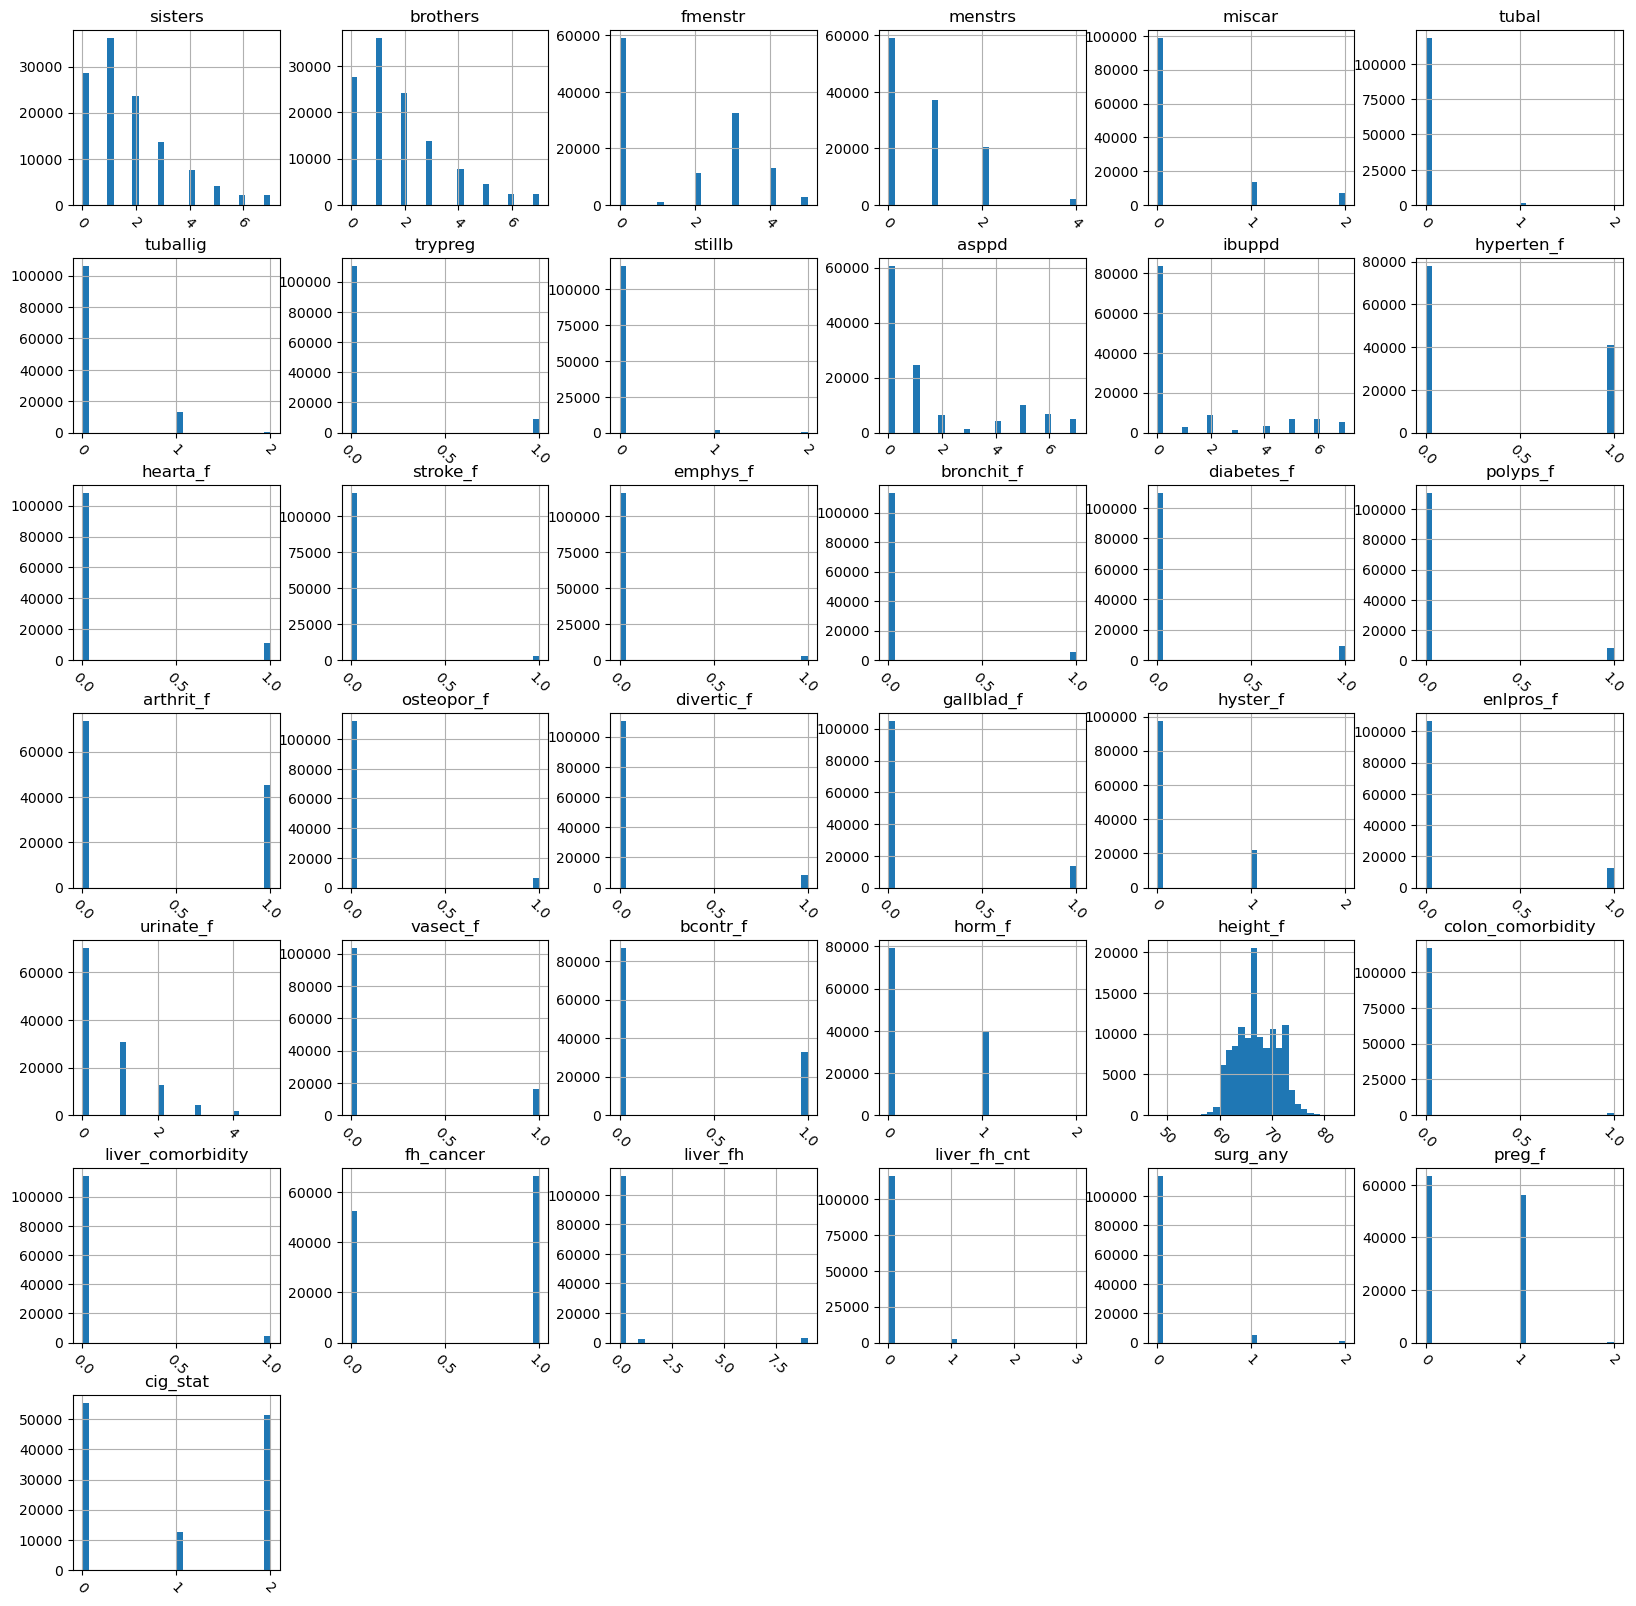

In [90]:
si_mv_lower_than_1_dt.hist(figsize=(20,20), bins = 30, xrot=-45)

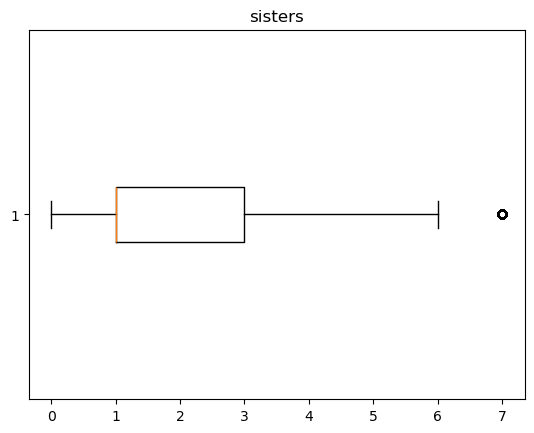

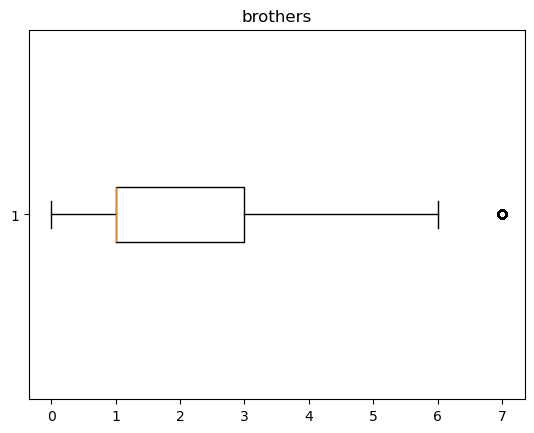

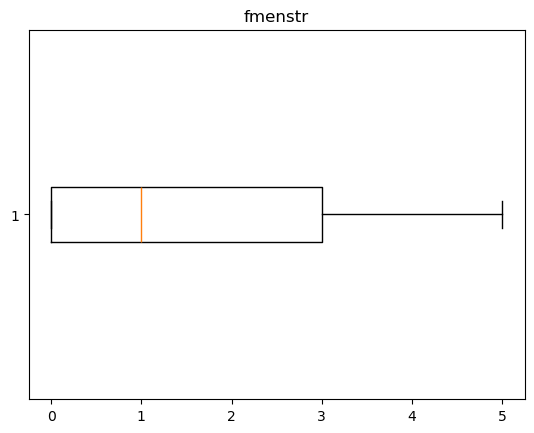

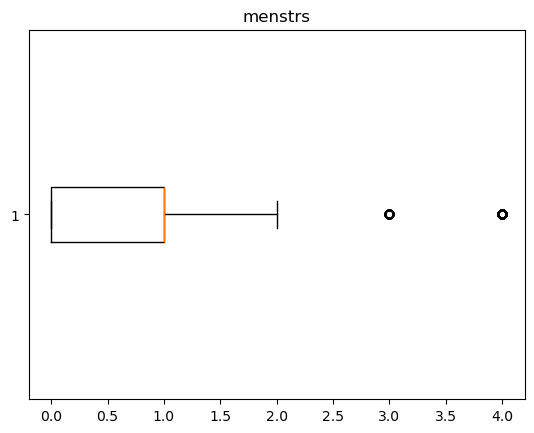

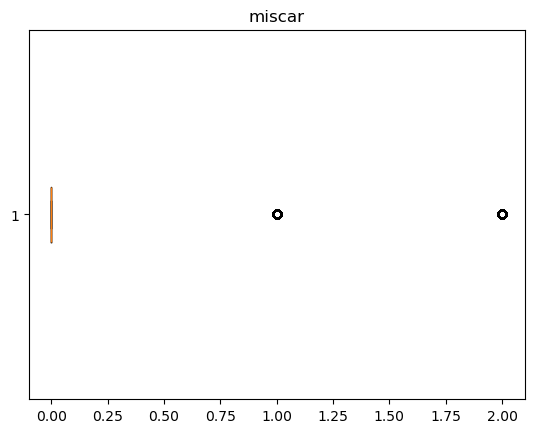

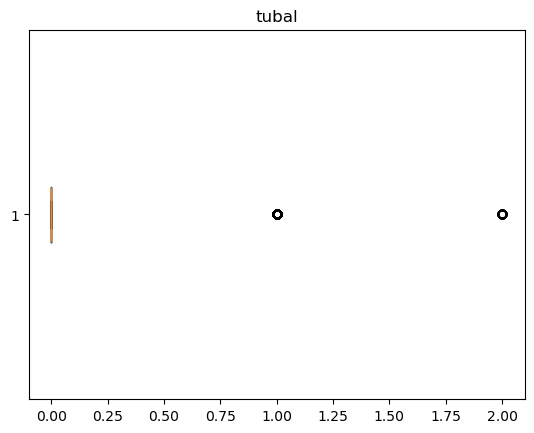

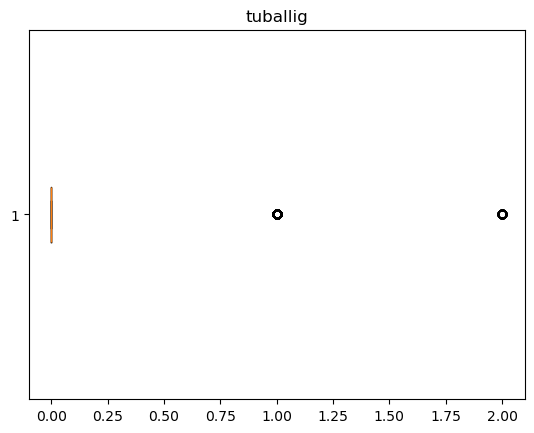

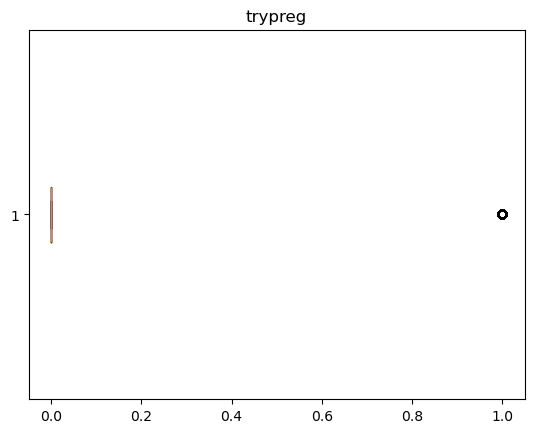

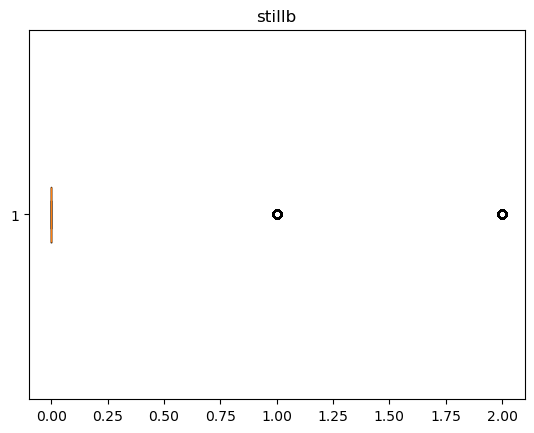

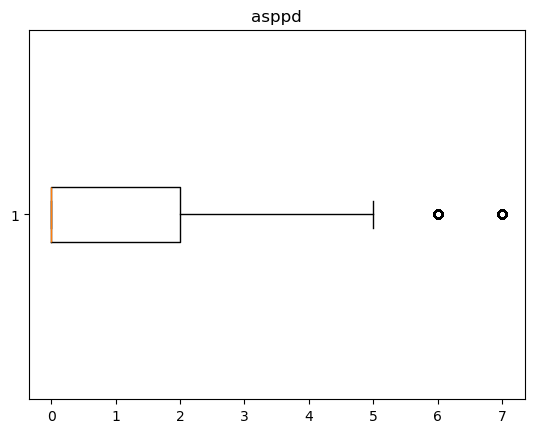

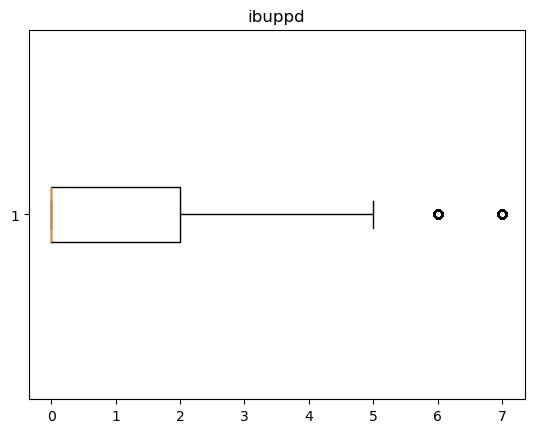

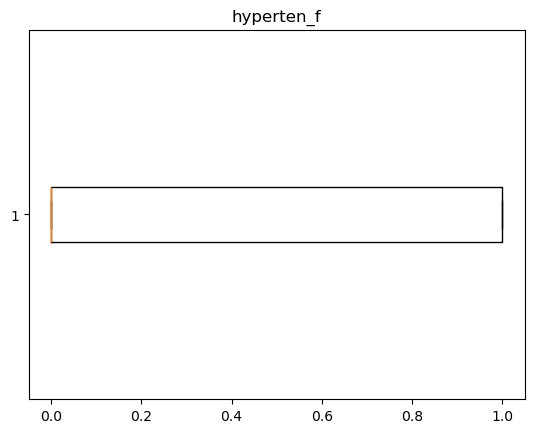

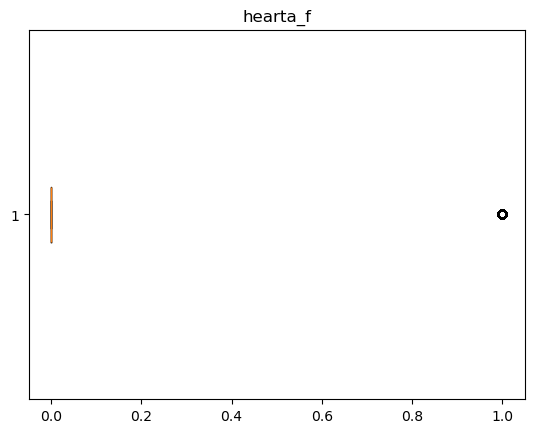

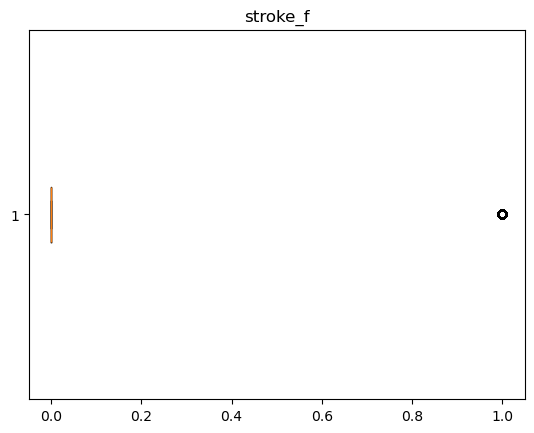

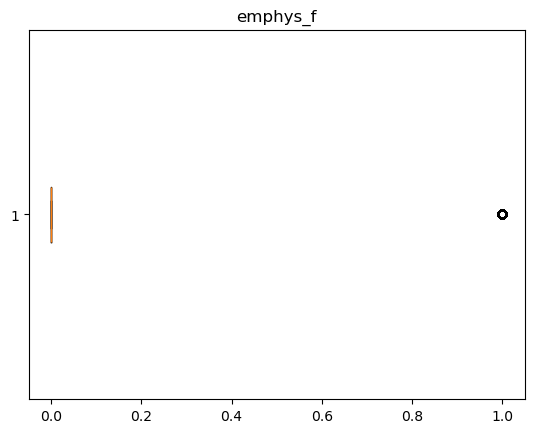

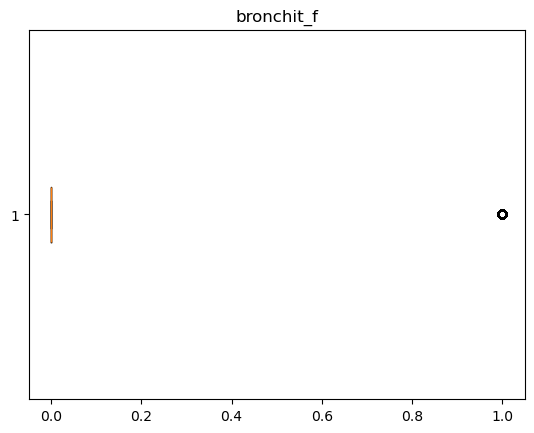

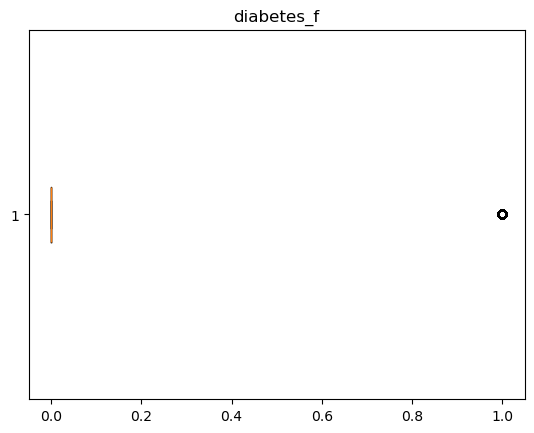

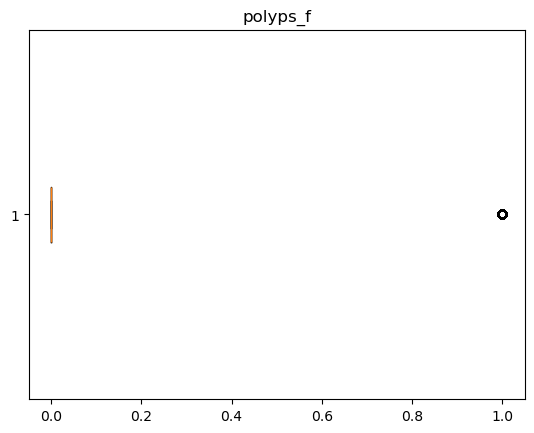

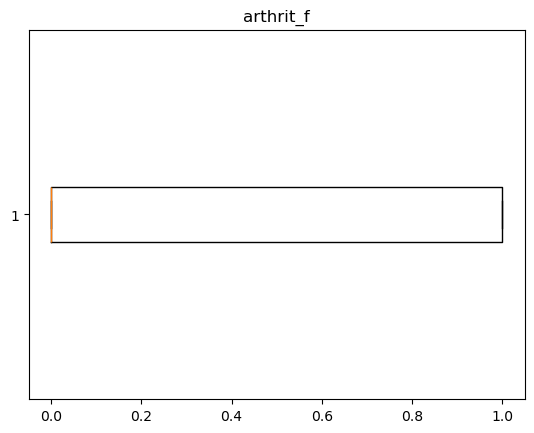

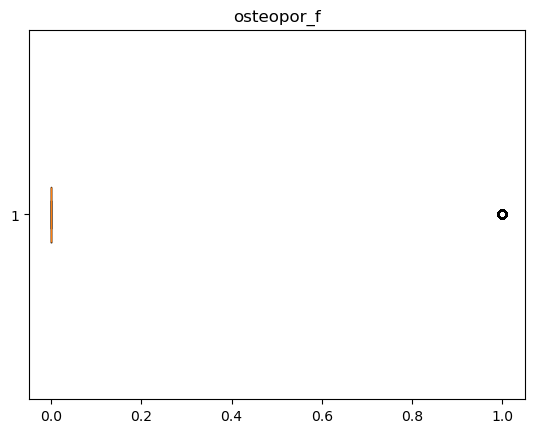

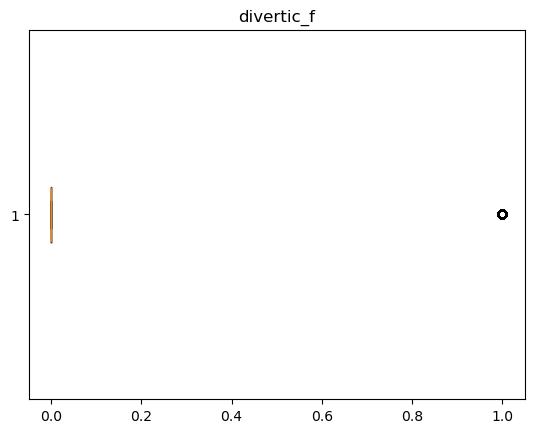

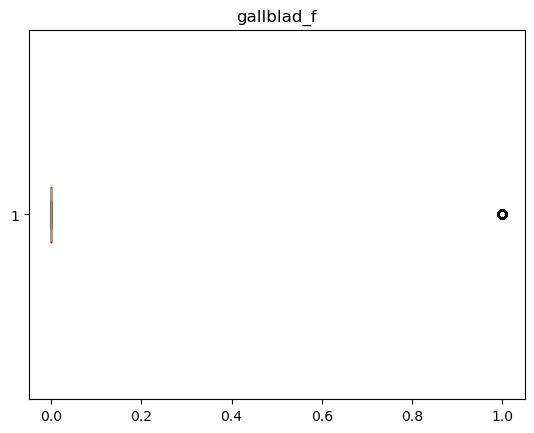

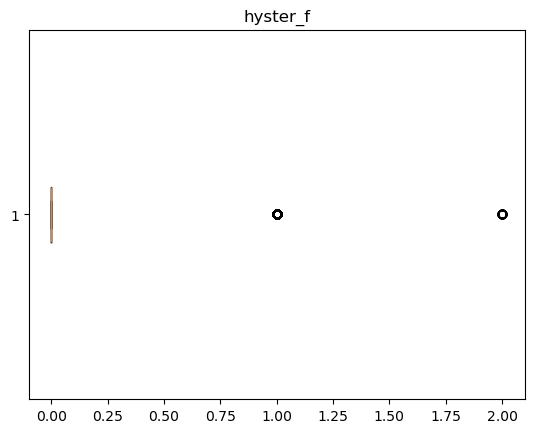

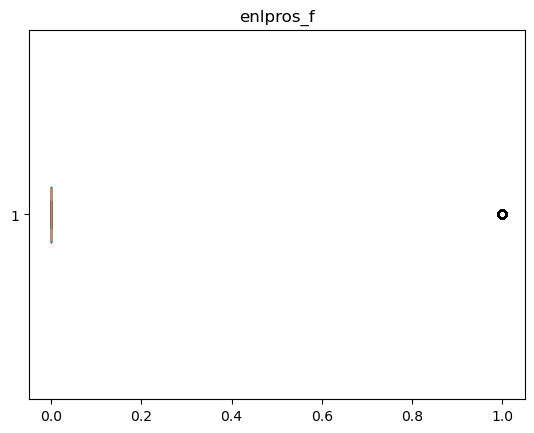

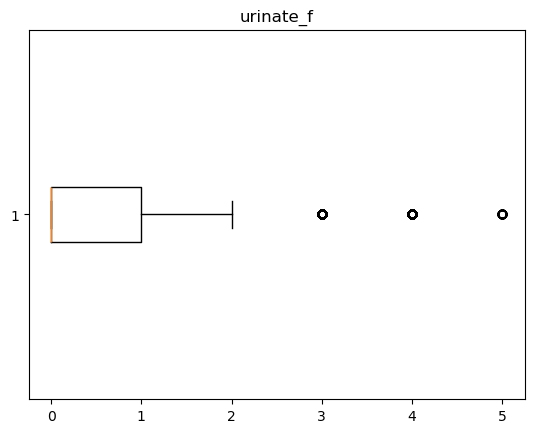

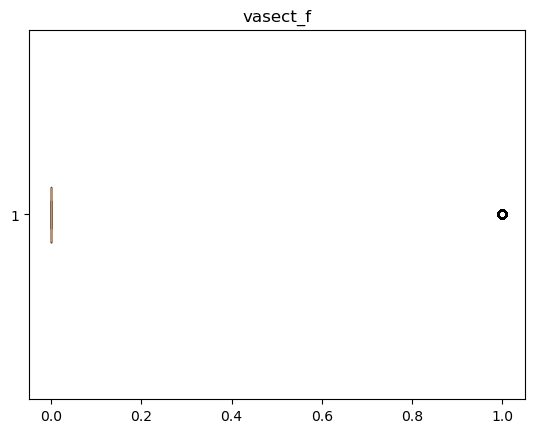

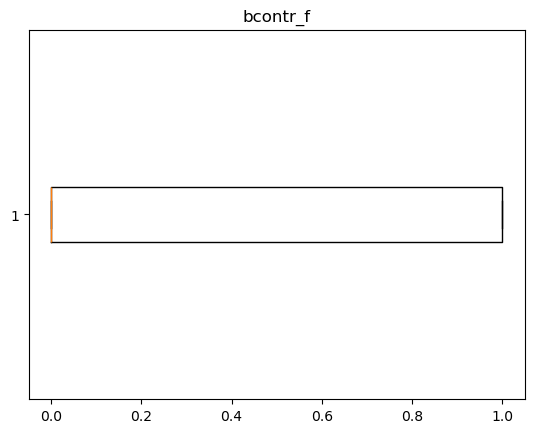

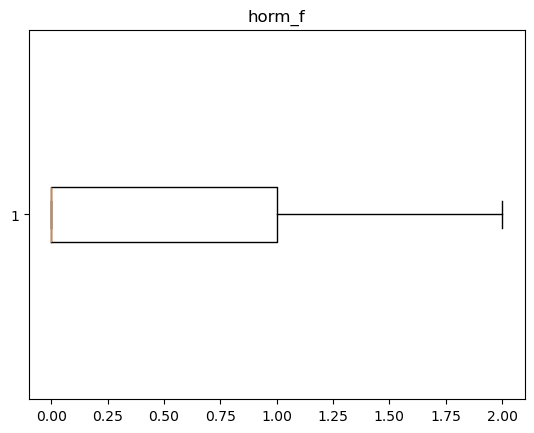

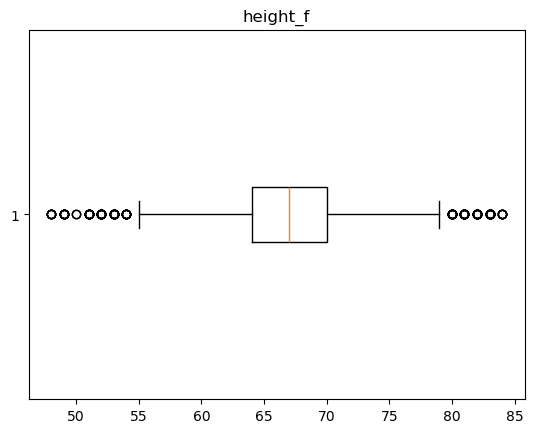

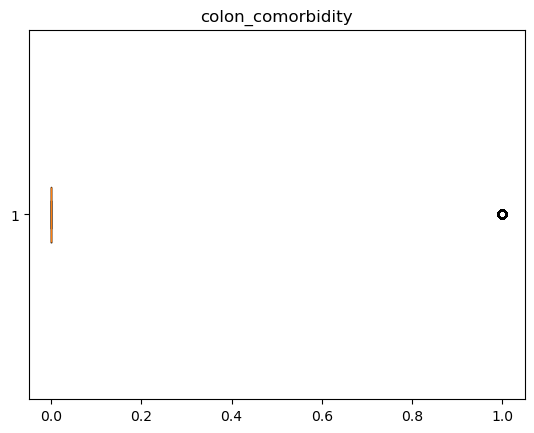

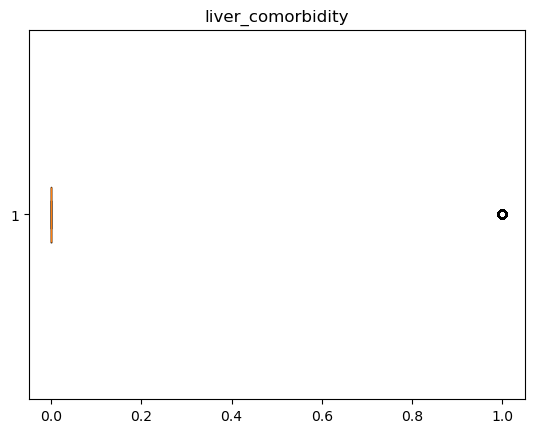

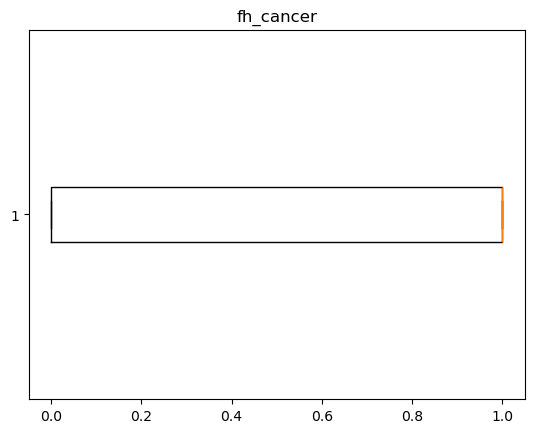

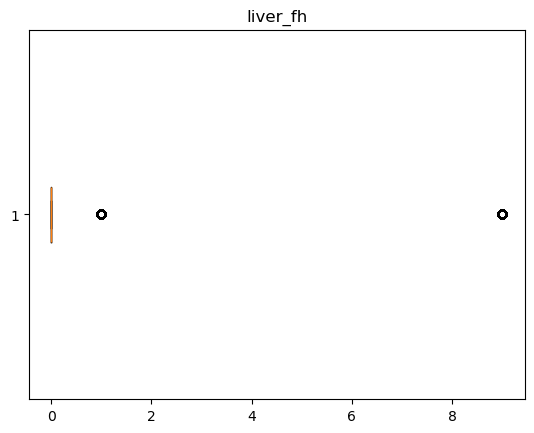

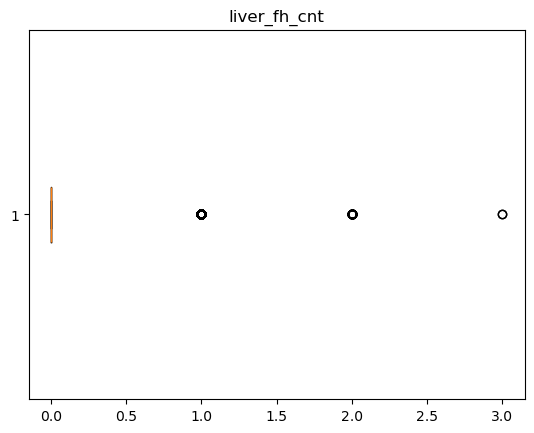

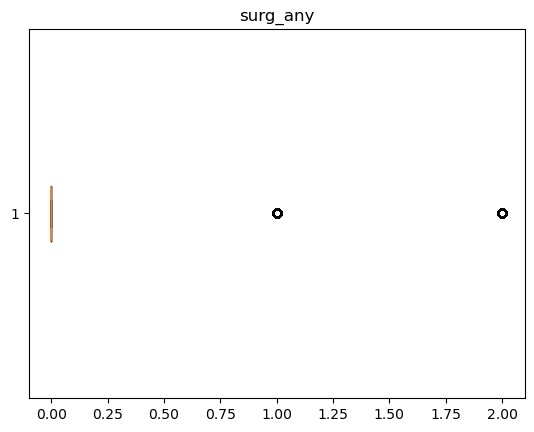

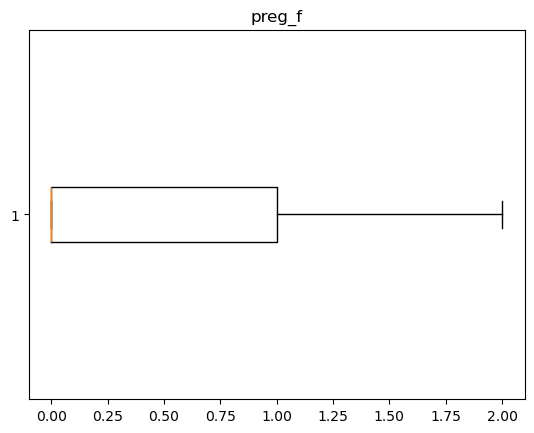

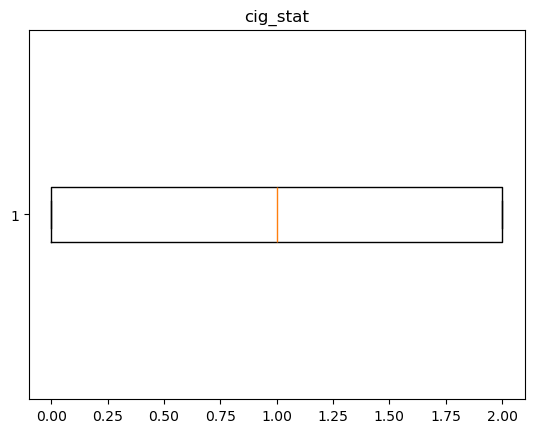

In [91]:
daf.boxplot_for_list(mean_median_imputed_train_df, si_mv_lower_than_1_dt)

In [92]:
mean_median_imputed_train_df['sisters'].fillna(mean_median_imputed_train_df['sisters'].mode()[0], inplace = True)
mean_median_imputed_train_df['brothers'].fillna(mean_median_imputed_train_df['brothers'].mode()[0], inplace = True)
mean_median_imputed_train_df['fmenstr'].fillna(mean_median_imputed_train_df['fmenstr'].mode()[0], inplace = True)
mean_median_imputed_train_df['menstrs'].fillna(mean_median_imputed_train_df['menstrs'].mode()[0], inplace = True)
mean_median_imputed_train_df['miscar'].fillna(mean_median_imputed_train_df['miscar'].mode()[0], inplace = True)
mean_median_imputed_train_df['tubal'].fillna(mean_median_imputed_train_df['tubal'].mode()[0], inplace = True)
mean_median_imputed_train_df['tuballig'].fillna(mean_median_imputed_train_df['tuballig'].mode()[0], inplace = True)
mean_median_imputed_train_df['trypreg'].fillna(mean_median_imputed_train_df['trypreg'].mode()[0], inplace = True)
mean_median_imputed_train_df['stillb'].fillna(mean_median_imputed_train_df['stillb'].mode()[0], inplace = True)
mean_median_imputed_train_df['asppd'].fillna(mean_median_imputed_train_df['asppd'].mode()[0], inplace = True)
mean_median_imputed_train_df['ibuppd'].fillna(mean_median_imputed_train_df['ibuppd'].mode()[0], inplace = True)
mean_median_imputed_train_df['hyperten_f'].fillna(mean_median_imputed_train_df['hyperten_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['hearta_f'].fillna(mean_median_imputed_train_df['hearta_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['stroke_f'].fillna(mean_median_imputed_train_df['stroke_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['emphys_f'].fillna(mean_median_imputed_train_df['emphys_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['bronchit_f'].fillna(mean_median_imputed_train_df['bronchit_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['diabetes_f'].fillna(mean_median_imputed_train_df['diabetes_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['polyps_f'].fillna(mean_median_imputed_train_df['polyps_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['arthrit_f'].fillna(mean_median_imputed_train_df['arthrit_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['osteopor_f'].fillna(mean_median_imputed_train_df['osteopor_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['divertic_f'].fillna(mean_median_imputed_train_df['divertic_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['gallblad_f'].fillna(mean_median_imputed_train_df['gallblad_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['hyster_f'].fillna(mean_median_imputed_train_df['hyster_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['enlpros_f'].fillna(mean_median_imputed_train_df['enlpros_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['urinate_f'].fillna(mean_median_imputed_train_df['urinate_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['vasect_f'].fillna(mean_median_imputed_train_df['vasect_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['bcontr_f'].fillna(mean_median_imputed_train_df['bcontr_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['horm_f'].fillna(mean_median_imputed_train_df['horm_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['height_f'].fillna(mean_median_imputed_train_df['height_f'].mean(), inplace = True)
mean_median_imputed_train_df['colon_comorbidity'].fillna(mean_median_imputed_train_df['colon_comorbidity'].mode()[0], inplace = True)
mean_median_imputed_train_df['liver_comorbidity'].fillna(mean_median_imputed_train_df['liver_comorbidity'].mode()[0], inplace = True)
mean_median_imputed_train_df['fh_cancer'].fillna(mean_median_imputed_train_df['fh_cancer'].mode()[0], inplace = True)
mean_median_imputed_train_df['liver_fh'].fillna(mean_median_imputed_train_df['liver_fh'].mode()[0], inplace = True)
mean_median_imputed_train_df['liver_fh_cnt'].fillna(mean_median_imputed_train_df['liver_fh_cnt'].mode()[0], inplace = True)
mean_median_imputed_train_df['surg_any'].fillna(mean_median_imputed_train_df['surg_any'].mode()[0], inplace = True)
mean_median_imputed_train_df['preg_f'].fillna(mean_median_imputed_train_df['preg_f'].mode()[0], inplace = True)
mean_median_imputed_train_df['cig_stat'].fillna(mean_median_imputed_train_df['cig_stat'].mode()[0], inplace = True)

### Imputation por regresion
---

In [94]:
# Creation of a dataset copy to proceed with the imputation
linear_regression_imputed_dataset = data_train_full_df.copy()

# Columns with NaN selection
columns_with_nulls = linear_regression_imputed_dataset.columns[linear_regression_imputed_dataset.isnull().any()].tolist()

In [95]:
# Predictors variables selection without NaN values
predictors = linear_regression_imputed_dataset.drop(columns=columns_with_nulls).select_dtypes(include=['float64', 'int64'])

In [96]:
# Linear regression imputation applied to each column
for column in columns_with_nulls:
    df_complete = linear_regression_imputed_dataset.dropna(subset=[column])
    df_missing = linear_regression_imputed_dataset[linear_regression_imputed_dataset[column].isnull()]

    # We ensure we have enough data to train the model
    if df_complete.shape[0] > 50 and predictors.shape[1] > 0:  
        X_lr = df_complete[predictors.columns]
        y_lr = df_complete[column]

        # Veryfiy target variable type
        is_categorical = linear_regression_imputed_dataset[column].dtype == 'int64'

        # Training and set division
        X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

        # Linear regression training
        model = LinearRegression()
        model.fit(X_train_lr, y_train_lr)

        # Missing values prediction
        predictions = model.predict(df_missing[predictors.columns])

        
        if is_categorical:
            predictions = np.round(predictions).astype(int)

        # Replace values into the dataset
        linear_regression_imputed_dataset.loc[linear_regression_imputed_dataset[column].isnull(), column] = predictions

### KNN
---

In [98]:
# Creation of a dataset copy to proceed with the imputation
dataset_imputed_KNN = data_train_full_df.copy()

# Select only numeric characteristics (KNN does not work with categorical ones)
numeric_columns = dataset_imputed_KNN.select_dtypes(include=['float64', 'int64']).columns

# KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
dataset_imputed_KNN[numeric_columns] = knn_imputer.fit_transform(dataset_imputed_KNN[numeric_columns])

## Multiple Imputation
---

### Metodo MICE (Multiple Imputation by Chained Equations)
---

In [101]:
# Creation of a dataset copy to proceed with the imputation
dataset_imputed_MICE = data_train_full_df.copy()

# Select only numeric characteristics (MICE does not work with categorical ones)
numeric_columns = dataset_imputed_MICE.select_dtypes(include=['float64', 'int64']).columns

# MICE imputation
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
dataset_imputed_MICE[numeric_columns] = mice_imputer.fit_transform(dataset_imputed_MICE[numeric_columns])

# Imputation Methods Comparison
---

In this section, we will evaluate and compare different imputation techniques applied to the dataset. Since missing values can significantly impact model performance, it is crucial to determine which imputation method provides the most reliable and accurate results.

**Key aspects of this comparison:**  
- **Distribution analysis** before and after imputation to assess the impact on data integrity.
- **Correlation changes** between features after applying each imputation method.
- **Evaluation using Machine Learning models** to measure the effectiveness of each technique based on RMSE and R² metrics.

By analyzing the results, we will identify the most suitable imputation method to enhance data quality and improve model performance.

<Figure size 1200x600 with 0 Axes>

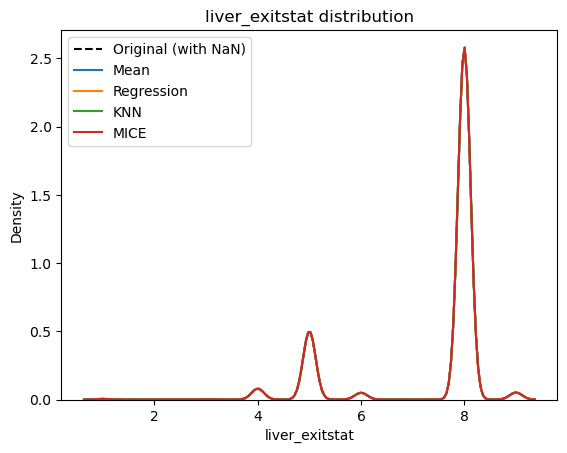

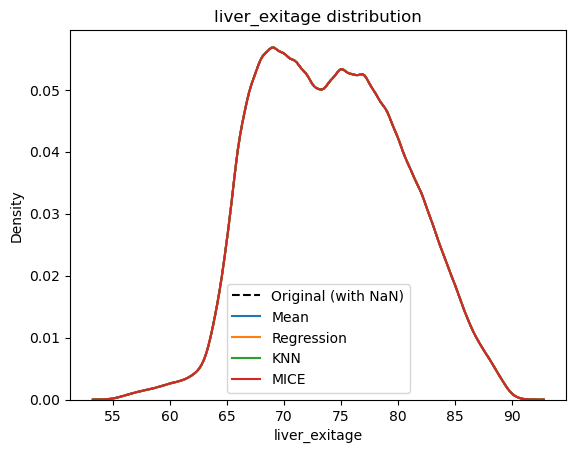

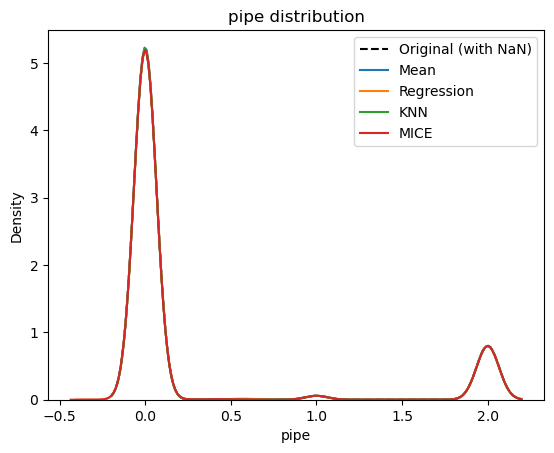

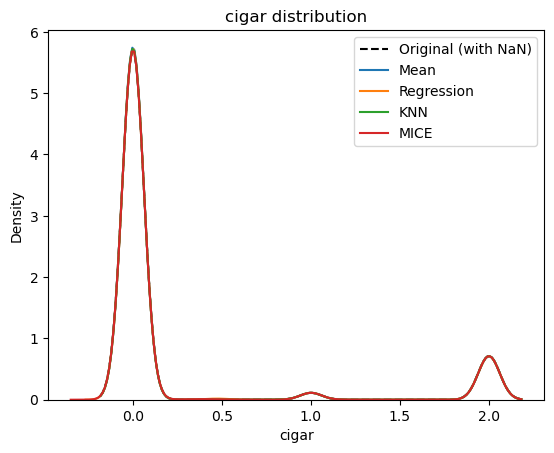

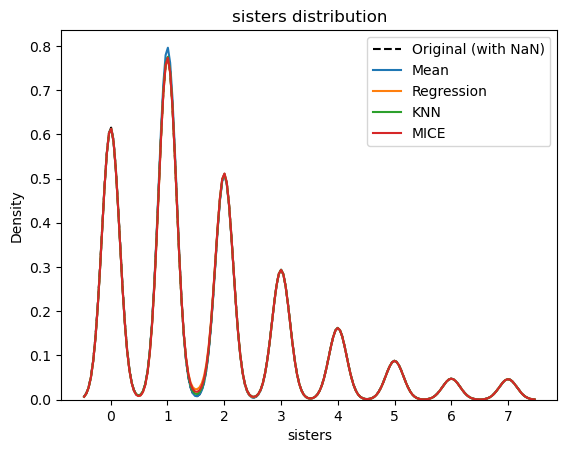

In [103]:
# Comparison of distribution before and after the imputation
plt.figure(figsize=(12, 6))
for col in numeric_columns[:5]:
    plt.figure()
    sns.kdeplot(data_train_full_df[col].dropna(), label="Original (with NaN)", color='black', linestyle="dashed")
    sns.kdeplot(mean_median_imputed_train_df[col], label="Mean")
    sns.kdeplot(linear_regression_imputed_dataset[col], label="Regression")
    sns.kdeplot(dataset_imputed_KNN[col], label="KNN")
    sns.kdeplot(dataset_imputed_MICE[col], label="MICE")
    plt.legend()
    plt.title(f"{col} distribution")
    plt.show()

In [104]:
# Target column definition
target_column = 'liver_cancer'
numeric_columns = data_train_full_df.select_dtypes(include=['float64', 'int64']).columns

# Compare correlations before and after the imputation
cor_original = data_train_full_df[numeric_columns].corr()
cor_mean = mean_median_imputed_train_df[numeric_columns].corr()
cor_regression = linear_regression_imputed_dataset[numeric_columns].corr()
cor_knn = dataset_imputed_KNN[numeric_columns].corr()
cor_mice = dataset_imputed_MICE[numeric_columns].corr()

# Showing changes in correlations
print("📌 Correlation changes (Original vs. Imputation)")
print("Mean differences:", (cor_original - cor_mean).abs().sum().sum())
print("Regression differences:", (cor_original - cor_regression).abs().sum().sum())
print("KNN differences:", (cor_original - cor_knn).abs().sum().sum())
print("MICE differences:", (cor_original - cor_mice).abs().sum().sum())

# Evaluation with different models 
X = data_train_full_df[numeric_columns].dropna()
y = X.pop(numeric_columns[0]) 

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}

# Evaluation
results = {}
for model_name, model in models.items():
    rmse_results = {}
    r2_results = {}

    for name, df in [("Mean and Median", mean_median_imputed_train_df), 
                     ("Regression", linear_regression_imputed_dataset), 
                     ("KNN", dataset_imputed_KNN), 
                     ("MICE", dataset_imputed_MICE)]:
        rmse, r2 = mmf.evaluate_model(df, X, y, model, numeric_columns, target_column)
        rmse_results[name] = rmse
        r2_results[name] = r2
        
    results[model_name] = {"RMSE": rmse_results, "R²": r2_results}

# Results
print("\n📊 Predictive Model evaluation:")
for model_name, metrics in results.items():
    print(f"\n📊 {model_name} evaluation:")
    for imputation, rmse in metrics["RMSE"].items():
        print(f"{imputation}: RMSE = {rmse:.4f}, R² = {metrics['R²'][imputation]:.4f}")

📌 Correlation changes (Original vs. Imputation)
Mean differences: 10.5607714020079
Regression differences: 8.758251296184765
KNN differences: 6.955690068735599
MICE differences: 12.868624864801406

📊 Predictive Model evaluation:

📊 Linear Regression evaluation:
Mean and Median: RMSE = 0.0388, R² = 0.0532
Regression: RMSE = 0.0388, R² = 0.0536
KNN: RMSE = 0.0388, R² = 0.0533
MICE: RMSE = 0.0388, R² = 0.0533

📊 KNN Regression evaluation:
Mean and Median: RMSE = 0.0386, R² = 0.0627
Regression: RMSE = 0.0387, R² = 0.0543
KNN: RMSE = 0.0388, R² = 0.0511
MICE: RMSE = 0.0390, R² = 0.0416

📊 Random Forest evaluation:
Mean and Median: RMSE = 0.0000, R² = 1.0000
Regression: RMSE = 0.0000, R² = 1.0000
KNN: RMSE = 0.0000, R² = 1.0000
MICE: RMSE = 0.0000, R² = 1.0000

📊 SVM evaluation:
Mean and Median: RMSE = 0.1053, R² = -5.9881
Regression: RMSE = 0.1053, R² = -5.9852
KNN: RMSE = 0.1053, R² = -5.9839
MICE: RMSE = 0.1053, R² = -5.9822

📊 XGBoost evaluation:
Mean and Median: RMSE = 0.0000, R² = 1.00

In [105]:
# Saving imputed dataset
mean_median_imputed_train_df.to_csv("../../0. Data/3. Imputed/mean_median_imputed_train_df.csv", index=False)

# Applying to test same transformation
---
Once the missing values in the **training dataset** have been handled using different imputation techniques, it is essential to **apply the same transformations** to the **test dataset** to maintain consistency.

This ensures that the preprocessing applied during model training is also reflected in the test set, preventing data leakage and ensuring that model evaluation is done under realistic conditions.

In this section, we replicate the chosen imputation strategy on the test dataset, ensuring that all missing values are filled **using the same methodology applied to training data.** This step guarantees that the test data remains aligned with the model’s expectations, leading to accurate and unbiased performance evaluation.

In [107]:
mean_median_imputed_test_df = data_test_full_df.copy()

In [108]:
mean_median_imputed_test_df['smokea_f'].fillna(mean_median_imputed_test_df['smokea_f'].median(), inplace = True)
mean_median_imputed_test_df['ssmokea_f'].fillna(mean_median_imputed_test_df['ssmokea_f'].mean(), inplace = True)
mean_median_imputed_test_df['filtered_f'].fillna(mean_median_imputed_test_df['filtered_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['pipe'].fillna(mean_median_imputed_test_df['pipe'].mode()[0], inplace = True)
mean_median_imputed_test_df['cigar'].fillna(mean_median_imputed_test_df['cigar'].mode()[0], inplace = True)
mean_median_imputed_test_df['bbd'].fillna(mean_median_imputed_test_df['bbd'].mode()[0], inplace = True)
mean_median_imputed_test_df['benign_ovcyst'].fillna(mean_median_imputed_test_df['benign_ovcyst'].mode()[0], inplace = True)
mean_median_imputed_test_df['endometriosis'].fillna(mean_median_imputed_test_df['endometriosis'].mode()[0], inplace = True)
mean_median_imputed_test_df['uterine_fib'].fillna(mean_median_imputed_test_df['uterine_fib'].mode()[0], inplace = True)
mean_median_imputed_test_df['surg_prostatectomy'].fillna(mean_median_imputed_test_df['surg_prostatectomy'].mode()[0], inplace = True)
mean_median_imputed_test_df['infpros_f'].fillna(mean_median_imputed_test_df['infpros_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['bmi_curc'].fillna(mean_median_imputed_test_df['bmi_curc'].mode()[0], inplace = True)
mean_median_imputed_test_df['bmi_20c'].fillna(mean_median_imputed_test_df['bmi_20c'].mode()[0], inplace = True)
mean_median_imputed_test_df['bmi_50c'].fillna(mean_median_imputed_test_df['bmi_50c'].mode()[0], inplace = True)
mean_median_imputed_test_df['sisters'].fillna(mean_median_imputed_test_df['sisters'].mode()[0], inplace = True)
mean_median_imputed_test_df['brothers'].fillna(mean_median_imputed_test_df['brothers'].mode()[0], inplace = True)
mean_median_imputed_test_df['fmenstr'].fillna(mean_median_imputed_test_df['fmenstr'].mode()[0], inplace = True)
mean_median_imputed_test_df['menstrs'].fillna(mean_median_imputed_test_df['menstrs'].mode()[0], inplace = True)
mean_median_imputed_test_df['miscar'].fillna(mean_median_imputed_test_df['miscar'].mode()[0], inplace = True)
mean_median_imputed_test_df['tubal'].fillna(mean_median_imputed_test_df['tubal'].mode()[0], inplace = True)
mean_median_imputed_test_df['tuballig'].fillna(mean_median_imputed_test_df['tuballig'].mode()[0], inplace = True)
mean_median_imputed_test_df['trypreg'].fillna(mean_median_imputed_test_df['trypreg'].mode()[0], inplace = True)
mean_median_imputed_test_df['stillb'].fillna(mean_median_imputed_test_df['stillb'].mode()[0], inplace = True)
mean_median_imputed_test_df['asppd'].fillna(mean_median_imputed_test_df['asppd'].mode()[0], inplace = True)
mean_median_imputed_test_df['ibuppd'].fillna(mean_median_imputed_test_df['ibuppd'].mode()[0], inplace = True)
mean_median_imputed_test_df['hyperten_f'].fillna(mean_median_imputed_test_df['hyperten_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['hearta_f'].fillna(mean_median_imputed_test_df['hearta_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['stroke_f'].fillna(mean_median_imputed_test_df['stroke_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['emphys_f'].fillna(mean_median_imputed_test_df['emphys_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['bronchit_f'].fillna(mean_median_imputed_test_df['bronchit_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['diabetes_f'].fillna(mean_median_imputed_test_df['diabetes_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['polyps_f'].fillna(mean_median_imputed_test_df['polyps_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['arthrit_f'].fillna(mean_median_imputed_test_df['arthrit_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['osteopor_f'].fillna(mean_median_imputed_test_df['osteopor_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['divertic_f'].fillna(mean_median_imputed_test_df['divertic_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['gallblad_f'].fillna(mean_median_imputed_test_df['gallblad_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['hyster_f'].fillna(mean_median_imputed_test_df['hyster_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['enlpros_f'].fillna(mean_median_imputed_test_df['enlpros_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['urinate_f'].fillna(mean_median_imputed_test_df['urinate_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['vasect_f'].fillna(mean_median_imputed_test_df['vasect_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['bcontr_f'].fillna(mean_median_imputed_test_df['bcontr_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['horm_f'].fillna(mean_median_imputed_test_df['horm_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['height_f'].fillna(mean_median_imputed_test_df['height_f'].mean(), inplace = True)
mean_median_imputed_test_df['colon_comorbidity'].fillna(mean_median_imputed_test_df['colon_comorbidity'].mode()[0], inplace = True)
mean_median_imputed_test_df['liver_comorbidity'].fillna(mean_median_imputed_test_df['liver_comorbidity'].mode()[0], inplace = True)
mean_median_imputed_test_df['fh_cancer'].fillna(mean_median_imputed_test_df['fh_cancer'].mode()[0], inplace = True)
mean_median_imputed_test_df['liver_fh'].fillna(mean_median_imputed_test_df['liver_fh'].mode()[0], inplace = True)
mean_median_imputed_test_df['liver_fh_cnt'].fillna(mean_median_imputed_test_df['liver_fh_cnt'].mode()[0], inplace = True)
mean_median_imputed_test_df['surg_any'].fillna(mean_median_imputed_test_df['surg_any'].mode()[0], inplace = True)
mean_median_imputed_test_df['preg_f'].fillna(mean_median_imputed_test_df['preg_f'].mode()[0], inplace = True)
mean_median_imputed_test_df['cig_stat'].fillna(mean_median_imputed_test_df['cig_stat'].mode()[0], inplace = True)

In [109]:
# Saving imputed dataset
mean_median_imputed_test_df.to_csv("../../0. Data/3. Imputed/mean_median_imputed_test_df.csv", index=False)

# Original dataset (no feature engineering) imputation - Using for Neural Networks
---
For deep learning models such as **Neural Networks,** different preprocessing strategies may be required compared to traditional Machine Learning models. Instead of using the engineered dataset, we consider working with the original dataset, maintaining all available information without extensive feature selection or transformations.

This approach allows **Neural Networks to automatically learn feature representations,** which can be beneficial in complex datasets. However, missing values still need to be handled appropriately to ensure the model receives **structured and complete data during training.**

In this section, we apply **basic imputation techniques** to the original dataset, ensuring that all missing values are filled. The resulting dataset will be specifically prepared for Neural Networks, preserving as much raw information as possible while ensuring data consistency and completeness.

In [111]:
original_dataset = pd.read_csv('../../0. Data/0. Original/liver_data_mar22_d032222.csv')
pd.set_option('display.max_columns', None)

In [112]:
original_dataset_copy = original_dataset.copy()
target = original_dataset_copy.liver_cancer
X = original_dataset_copy.drop(columns=['liver_cancer'])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [114]:
data_train_original_df = pd.concat([X_train, y_train], axis=1)
data_test_original_df = pd.concat([X_test, y_test], axis=1)

In [115]:
# Imputation
original_train_without_nan_df = daf.impute_missing_values(data_train_original_df)

In [116]:
categorical_columns = original_train_without_nan_df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print(f"Categorical columns detected and converted: {categorical_columns.tolist()}")
    original_train_without_nan_df = pd.get_dummies(original_train_without_nan_df, columns=categorical_columns)

In [117]:
# Imputation
original_test_without_nan_df = daf.impute_missing_values(data_test_original_df)

In [118]:
categorical_columns = original_test_without_nan_df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print(f"Categorical columns detected and converted: {categorical_columns.tolist()}")
    original_test_without_nan_df = pd.get_dummies(original_test_without_nan_df, columns=categorical_columns)

In [119]:
original_train_without_nan_df.to_csv("../../0. Data/3. Imputed/original_train_without_nan_df.csv", index=False)
original_test_without_nan_df.to_csv("../../0. Data/3. Imputed/original_test_without_nan_df.csv", index=False)